# Analyse island size distribution

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from dataclasses import dataclass

@dataclass
class State:
    N: int
    r: np.ndarray # (2, N)
    s: np.ndarray # (, N)
    f: np.ndarray # (, N)
    neighbours: np.ndarray # (8, N)

def show(state, figsize=(5, 5)):
    fig = plt.figure(figsize=figsize)
    axis = fig.gca()
    x = state.r[:, 0]
    y = state.r[:, 1]
    s = 6
    axis.scatter(x[state.f == 0], y[state.f == 0], c='darkblue', s=s)
    axis.scatter(x[state.f == 1], y[state.f == 1], c='olive', s=s)
    
def build(state, k):
    state.f[k] = 1
    for k in state.neighbours[k]:
        # increase the respective s
        n_neighbours = 8
        state.s[k] += 1./n_neighbours
    
def getNeighbours(k, N, nx):
    return [m % N for m in [k-1, k+1, k-nx-1, k-nx, k-nx+1, k+nx-1, k+nx, k+nx+1]]
    

def create():
    N, nx, L = 22500, 150, 100
    x = np.linspace(0., L, nx)
    y = np.linspace(0., L, nx)
    xx, yy = np.meshgrid(x, y)
    r = np.stack((xx, yy), axis=2).reshape((N, 2))
    s = np.zeros(N)
    f = np.zeros(N)
    neighbours = np.array([getNeighbours(k, N, nx) for k in range(N)])
    state = State(N, r, s, f, neighbours)
    return state

def init():
    state = create()
    for i in np.argwhere(rng.random(state.N) < 0.01):
        build(state, i[0])
    return state

def step(state, susceptible):
    k = rng.choice(np.argwhere(susceptible))
    if rng.random() < 0.01:
        build(state, k)
        susceptible[k] = 0
        for i in state.neighbours[k]:
            susceptible[i] = state.f[i] == 0

In [233]:
rng = np.random.default_rng()

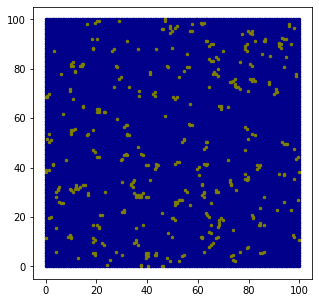

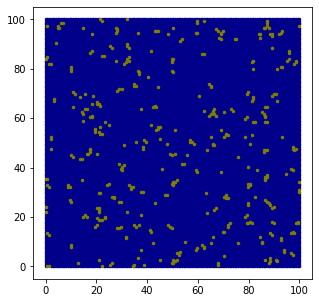

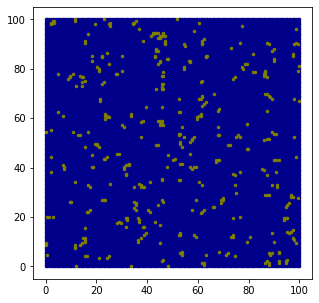

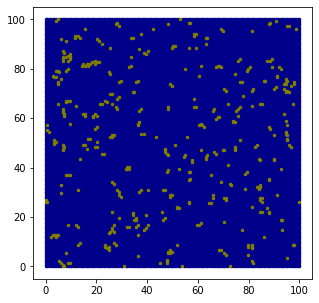

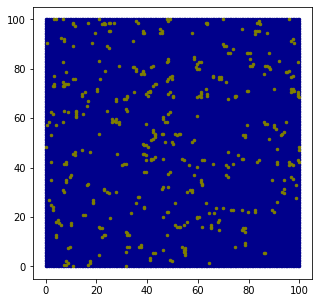

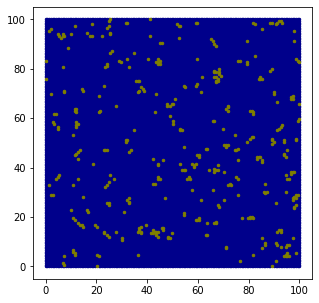

In [239]:
data = []
for i in range(6):
    state = init()
    susceptible = np.zeros(state.N)
    for i in np.argwhere(np.logical_and(state.s > 0, state.f == 0)):
        susceptible[i[0]] = 1
    for _ in range(20000):
        if not np.any(susceptible):
            break
        step(state, susceptible)
    show(state)

    data.append(np.bincount(count_islands(state, inverse=False), minlength=30))


In [236]:
data

[array([  0, 201,  24,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int64),
 array([  0, 202,  17,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int64),
 array([  0, 204,  16,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int64),
 array([  0, 207,  25,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int64),
 array([  0, 185,  22,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int64),
 array([  0, 201,  23,   3,   0,   0,   0,   0,   0,   

C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3528/2877920005.py:2: RuntimeWarning: divide by zero encountered in log
  plt.errorbar(np.arange(30), np.log(np.mean(data, axis=0)),yerr=np.log(np.std(data, axis=0)), fmt='o')
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:3419: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


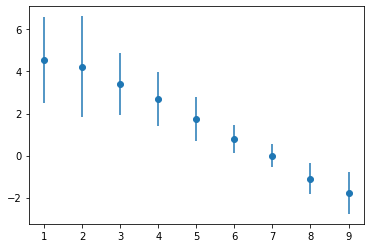

In [241]:
plt.figure()
plt.errorbar(np.arange(30), np.log(np.mean(data, axis=0)),yerr=np.log(np.std(data, axis=0)), fmt='o')
plt.show()

In [158]:
class Graph:
    
    def __init__(self, nrows, ncols, graph):
        self.ROW = nrows
        self.COL = ncols
        self.graph = graph
        
    def isSafe(self, rowN, colN):
        # rowN and colN in range
        # val is 1
        # place has not been visited
        return (0 <= rowN < self.ROW and
                0 <= colN < self.COL and
                self.graph[rowN][colN] and
                not self.visited[rowN][colN])
        
    def countIslands(self):
        
        # make boolean array
        self.visited = np.zeros((self.ROW, self.COL))
        
        islands = []
        for i in range(self.ROW):
            for j in range(self.COL):
                if (not self.visited[i][j] and
                    self.graph[i][j]):
                    size = self.DFS(i, j)
                    islands.append(size)
        
        return islands
    
    def DFS(self, i, j):
        
        # These arrays are used to get row and
        # column numbers of 8 neighbours
        # of a given cell
        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1];
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1];
         
        # Mark this cell as visited
        self.visited[i][j] = True
        size = 1
 
        # Recur for all connected neighbours
        for k in range(8):
            if self.isSafe(i + rowNbr[k], j + colNbr[k]):
                size += self.DFS(i + rowNbr[k], j + colNbr[k])
        
        return size
        

def count_islands(_state, inverse=True):
    
    # val which indicates island
    control_val = 0 if inverse else 1
    
    # transform 1d array f into 2d
    Nsite = int(np.sqrt(_state.N))
    transformed = _state.f.reshape((Nsite, Nsite)) == control_val
    
    row = len(transformed)
    col = len(transformed[0])

    g = Graph(row, col, transformed)
    islands = g.countIslands()
    
    #print ("Number of islands is:")
    #print (islands)
    
    return islands

In [273]:
# analytical model
tau = 0.01
sizes = np.arange(1, 10, 1)
nn = lambda size: 1 + 4 * size * size # 6 + 2 * size
ds = lambda islands, k: tau * nn(islands[k]) / np.sum([nn(j) for j in islands])

islands = np.ones(500)
rng2 = np.random.default_rng(seed=101)
indices = np.arange(0, len(islands), 1)
for _ in range(40000):
    nnList = [nn(size) for size in islands]
    nnWeights = nnList / np.sum(nnList)
    k = rng2.choice(indices, p=nnWeights)
    if (rng2.random() < tau):
        islands[k] += 1

counts = []
for size in sizes:
    count = np.sum(islands == size)
    print(f'{count} islands of size {size} ')
    counts.append(count)

362 islands of size 1 
78 islands of size 2 
23 islands of size 3 
14 islands of size 4 
7 islands of size 5 
6 islands of size 6 
1 islands of size 7 
2 islands of size 8 
0 islands of size 9 


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_3528/2422664178.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(counts), 'o--')


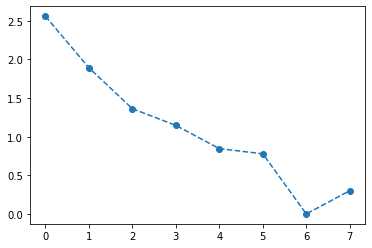

In [274]:
plt.figure()
plt.plot(np.log10(counts), 'o--')
plt.show()

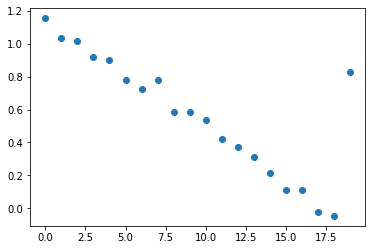

In [324]:
# Ns
# state is set of Ns for s = 1 .. 10
rngNs = np.random.default_rng()

nn = lambda s: 2*s

def nsStep(state):
    # select Ns
    helper = np.array([s * nn(i+1) for i, s in enumerate(state)])
    weights = helper[:-1] / np.sum(helper[:-1])
    #print(weights)
    Ns = rngNs.choice(range(19), p=weights)
    state[Ns] -= 0.05
    state[Ns+1] += 0.05
    
nsState = np.zeros(20)
nsState[0] = 100

for _ in range(12000):
    nsStep(nsState)
    
plt.figure()
plt.plot(np.log10(nsState), 'o')
plt.show()